### Importing librarys

In [1]:
!pip install xgboost

In [2]:
import numpy as np    # Used to perform mathematical caluclations. 
import pandas as pd   # pandas lib is used for tabular data preprocessing and cleaning
import matplotlib.pyplot as plt  # matplotlib lib is used for drawing visualizations for the data
import seaborn as sns         # seaborn lib is used for drawing visualizations for the data
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder # Labels can be normalised using LabelEncoder, it can also be used to convert labels that are not numerical into labels that are.
from sklearn.preprocessing import StandardScaler # StandardScaler lib is sed for standerdising the numarical data and make the scales equal.
from sklearn.ensemble import RandomForestClassifier # It is based on decision trees, which are simple yet powerful models for predicting outcomes based on a set of input features.
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting Classifier is an ensemble machine learning algorithm that is widely used for classification tasks. 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # train_test_split used to split the dataset into train data and test data.
import xgboost as xg #It is based on the Gradient Boosting algorithm and has been optimized for both speed and accuracy.
from sklearn.metrics import accuracy_score # used in machine learning to evaluate the accuracy of a classification model. It is a measure of how well the model predicts the correct class label for the input data.
import warnings                    # filterwarnings is used for filtering and supressing any warnings during the data cleaning.
warnings.filterwarnings('ignore')

### Loading the dataset

In [3]:
data=pd.read_csv("train.csv")
data.head()  # .head() will return you the top 5 rows of the dataset.

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
data

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


### Finding  duplicat values in the dataset

In [5]:
data.duplicated().sum() # Duplicat command is used to findout the duplicate row in the given dataset

0

### Observation:
1. There are no duplicate rows in the dataset.

### Shape of the dataset

In [6]:
data.shape   # The shape of the data set is given in the tuple formate.

(67463, 35)

### Observation:
1. There are 67463 datapoints and 35 features in the given dataset.

### Basic information of the dataset

In [7]:
data.info()
# info is a function that returns the basic iformation like number of non-null values, dtype and all the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

### Observation:
1. Dataset contains 67463 datapoints.
2. The dataset contains both the numarical as well catogorical information

### Finding the present of missing or null values in the dataset 

In [8]:
data.isnull().sum()   # isnull().sum() used to see the number of null values in the data column

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

### Observation:
1. It is observed that there are no missing values in the dataset

### columns that are presecnt in dataset

In [9]:
data.columns  # .columns will return all the column names.

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

### Observation:
1. Statistical information on the numarical columns

In [10]:
data.describe() 
# .describe() used to on the numarical columns and it will return the discriptive statistics of the values.

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


### Findng the number of unique values in the each column.

In [11]:
data.nunique()     # nunique will return the unique values in the each column

ID                              67463
Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Batch Enrolled                     41
Interest Rate                   67448
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  67454
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection R

In [12]:
data.T # data.T used to transpose the data

,0,1,2,3,4,5,6,7,8,9,...,67453,67454,67455,67456,67457,67458,67459,67460,67461,67462
ID,65087372,1450153,1969101,6651430,14354669,50509046,32737431,63151650,4279662,4431034,...,14669554,3793301,60961518,39022390,7273094,16164945,35182714,16435904,5300325,65443173
Loan Amount,10000,3609,28276,11170,16890,34631,30844,20744,9299,19232,...,31161,9712,5127,11703,11440,13601,8323,15897,16567,15353
Funded Amount,32236,11940,9311,6954,13226,30203,19773,10609,11238,8962,...,16000,25896,16956,19736,17672,6848,11046,32921,4975,29875
Funded Amount Investor,12329.36286,12191.99692,21603.22455,17877.15585,13539.92667,8635.931613,15777.51183,7645.014802,13429.45661,7004.097481,...,8386.746929,8740.589841,13917.48522,9972.202696,22965.7629,13175.28583,15637.46301,12329.45775,21353.68465,14207.4486
Term,59,59,59,59,59,36,59,58,59,58,...,59,58,59,59,59,59,59,59,59,59
Batch Enrolled,BAT2522922,BAT1586599,BAT2136391,BAT2428731,BAT5341619,BAT4694572,BAT4808022,BAT2558388,BAT5341619,BAT2078974,...,BAT4808022,BAT2136391,BAT2522922,BAT5547201,BAT2558388,BAT3193689,BAT1780517,BAT1761981,BAT2333412,BAT1930365
Interest Rate,11.135007,12.237563,12.545884,16.731201,15.0083,17.246986,10.731432,13.993688,11.178457,5.520413,...,6.524646,14.729811,19.388683,11.430757,15.02526,9.408858,9.972104,19.650943,13.169095,16.034631
Grade,B,C,F,C,C,B,C,A,G,C,...,A,B,C,E,C,C,C,A,D,B
Sub Grade,C4,D3,D4,C3,D4,G5,C5,A5,C2,B5,...,C2,A3,F3,D4,B1,A4,B3,F3,E3,D1
Employment Duration,MORTGAGE,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT,OWN,MORTGAGE,RENT,...,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT,MORTGAGE,RENT,MORTGAGE,OWN,MORTGAGE


In [13]:
# This loop gives the count of unique values that are present in the column
for i in data.columns: 
    print(i)
    print(data[i].value_counts())
    print('*-*'*30)

ID
65087372    1
67169611    1
51765039    1
31003776    1
7030387     1
           ..
4898110     1
35796018    1
23689675    1
1534700     1
65443173    1
Name: ID, Length: 67463, dtype: int64
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Loan Amount
15932    13
14424    12
15800    11
15639    11
15118    11
         ..
2588      1
33968     1
5420      1
12285     1
8323      1
Name: Loan Amount, Length: 27525, dtype: int64
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Funded Amount
10835    16
11034    15
11451    14
10728    14
7691     14
         ..
23126     1
14571     1
33015     1
33109     1
29875     1
Name: Funded Amount, Length: 24548, dtype: int64
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Funded Amount Investor
12099.718300    2
7890.447955     2
13910.430240    2
8879.914835     2
12367.568060    2
               ..
7649.614605    

In [14]:
data.drop(['ID','Payment Plan','Accounts Delinquent'],axis=1,inplace=True)
data.shape

(67463, 32)

### Observation:
1. The shape of the data set is changes after droping three unused columns.
2. The columns Payment Plan and Accounts Delinquent are having a unique value entier the dataset.

<AxesSubplot:>

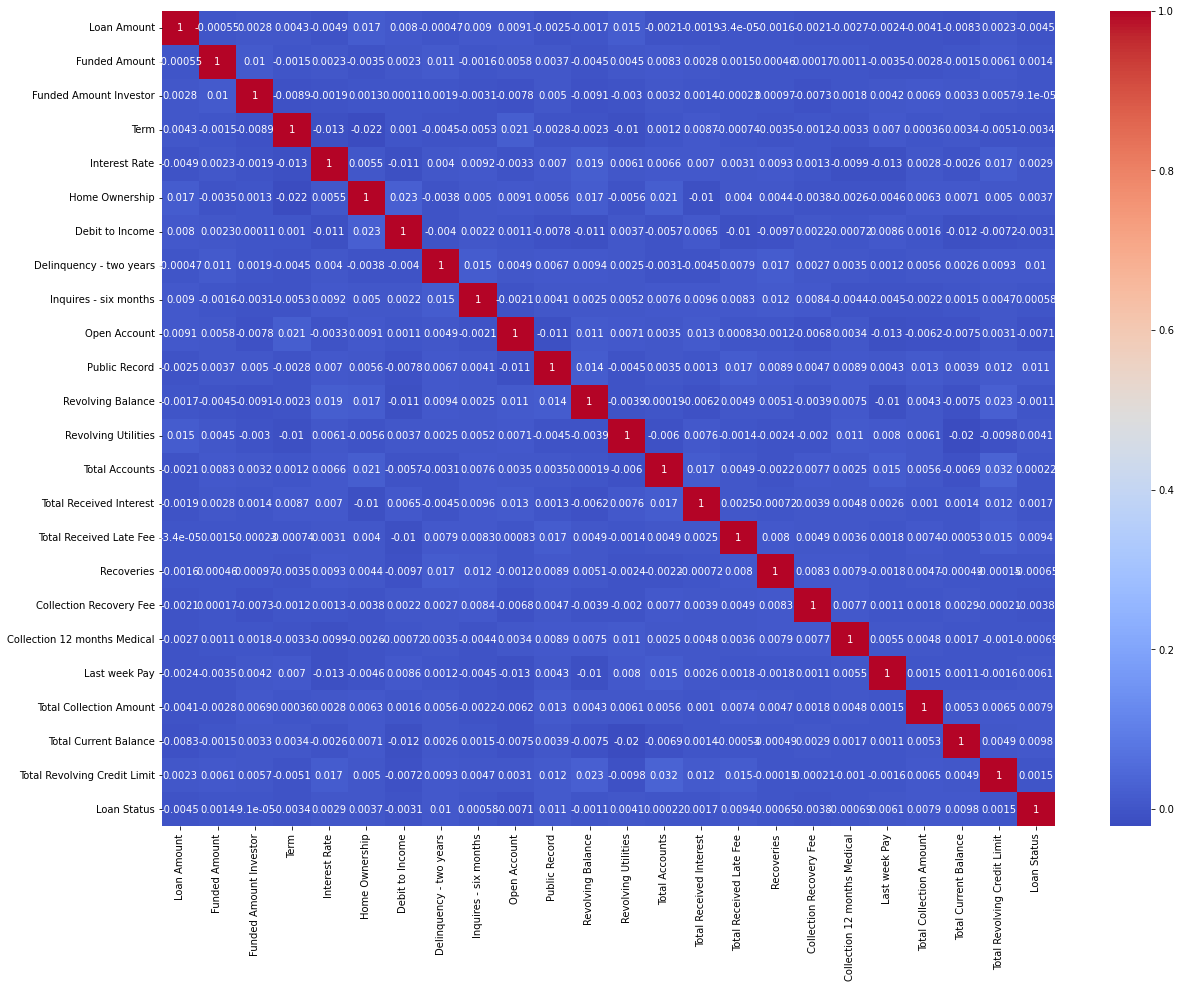

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot = True,cmap='coolwarm')

In [16]:
### Feature engineering.

In [17]:
current_year = 2023
data['Debt-to-Income Ratio'] = data['Debit to Income'] / data['Loan Amount']
data['Credit Utilization Ratio'] = data['Revolving Balance'] / data['Total Revolving Credit Limit']
data['Time Since Last Delinquency'] = current_year - data['Delinquency - two years']

### Observation:
1. Adding three more columns in the dataset.
2. Debt-to-Income Ratio= Debit to Income / Loan Amount
3. Credit Utilization Ratio= Revolving Balance / Total Revolving Credit Limit
4. Time Since Last Delinquency= current_year - Delinquency - two years

### Data Visualization.

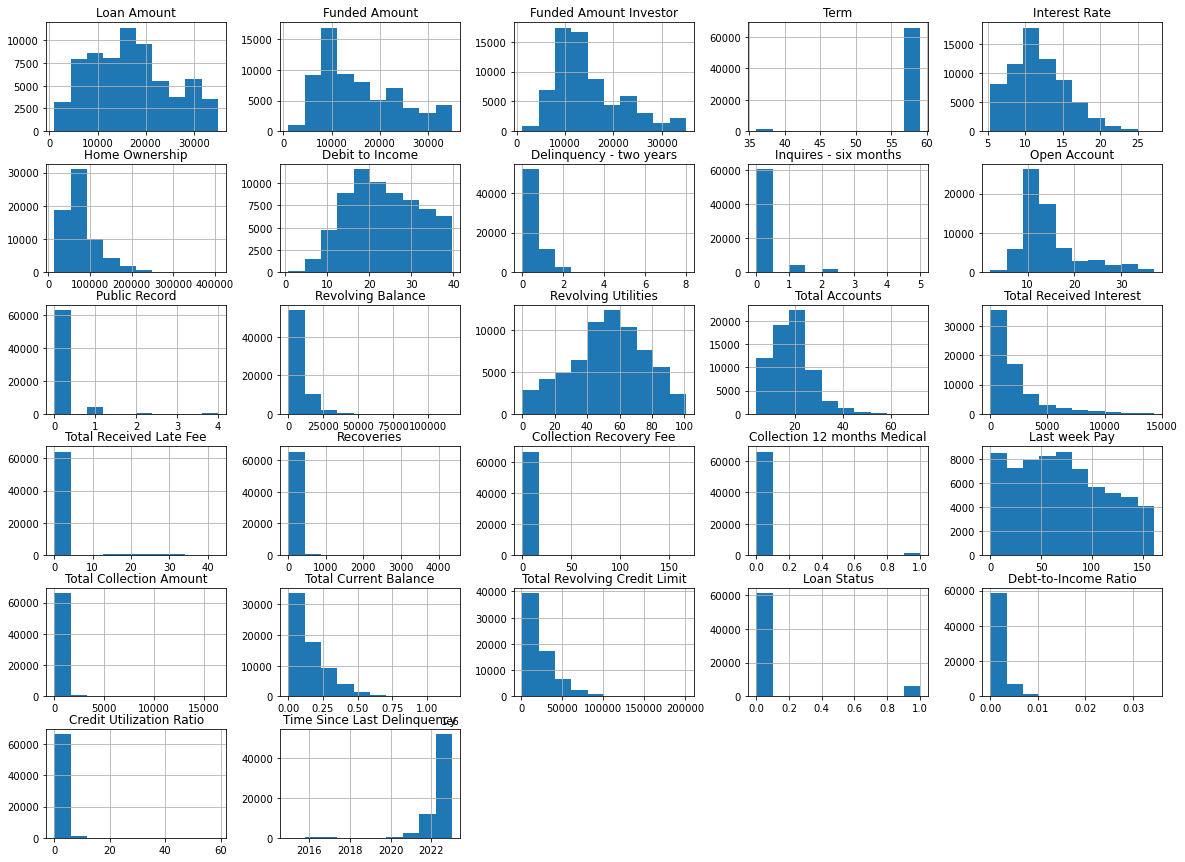

In [18]:
data.hist(figsize=(20,15)) # hist - histogram, data.hist gives the histograme on the entier numarical columns
plt.show()

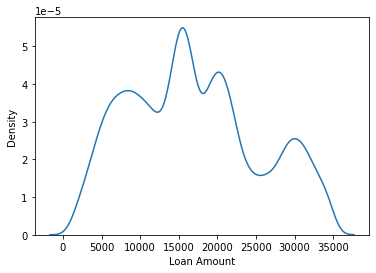

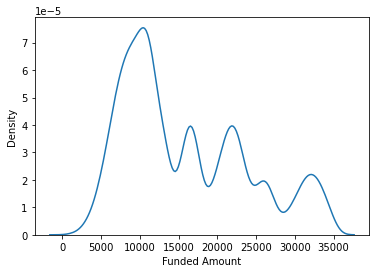

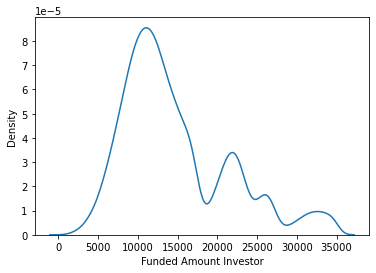

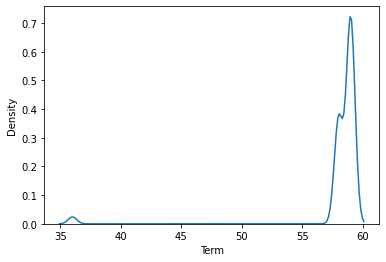

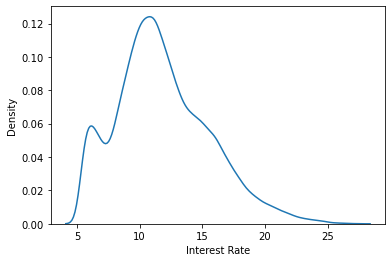

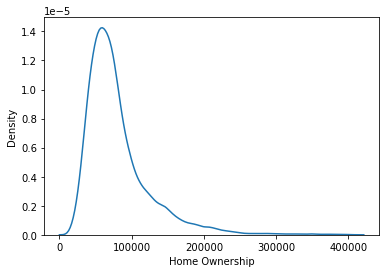

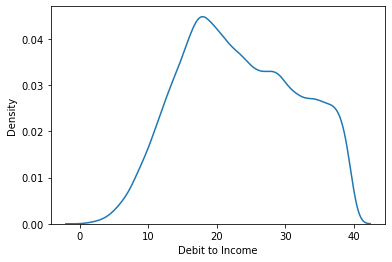

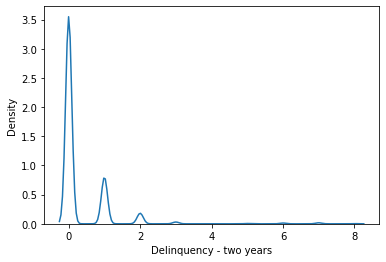

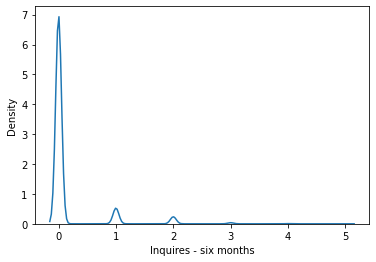

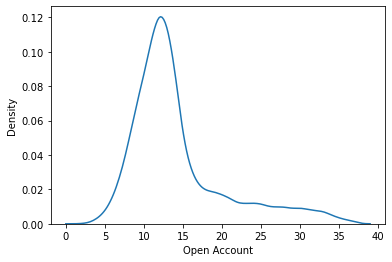

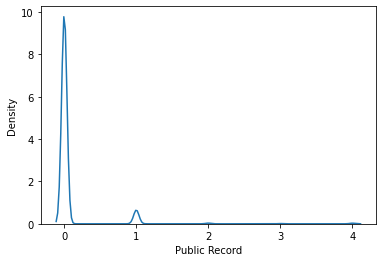

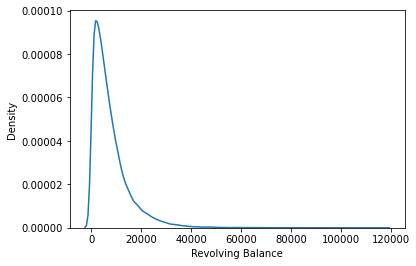

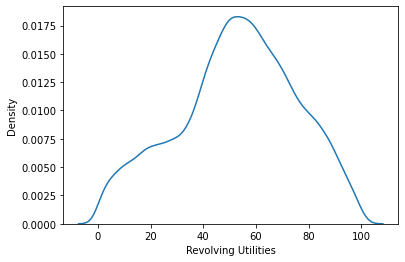

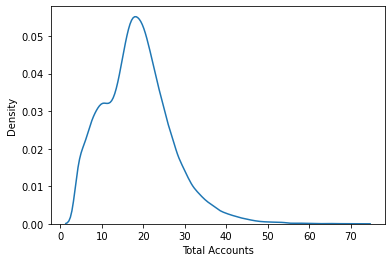

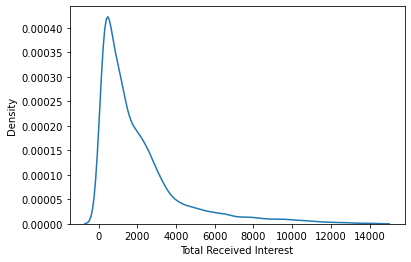

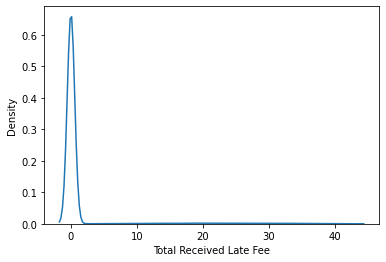

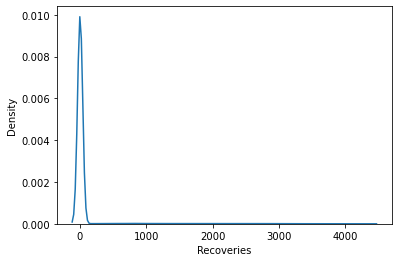

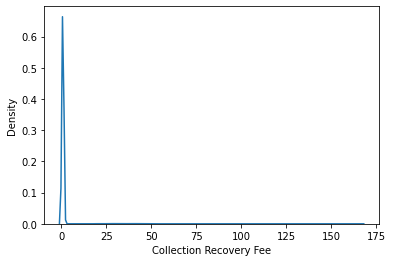

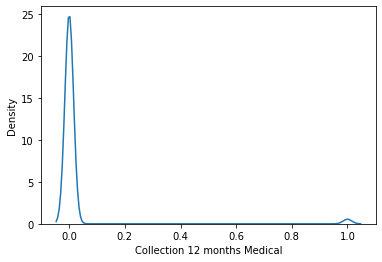

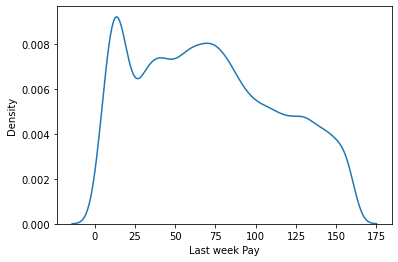

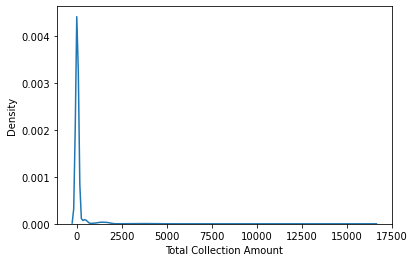

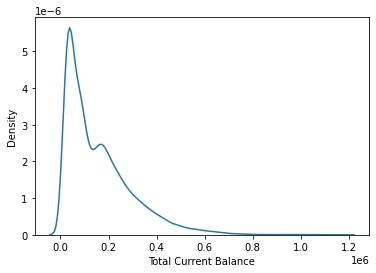

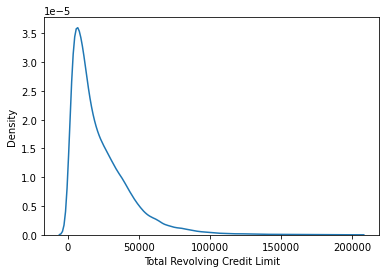

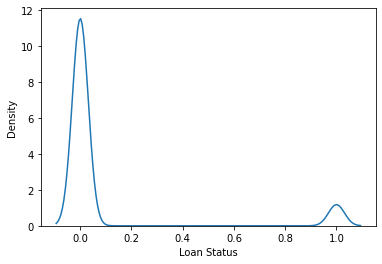

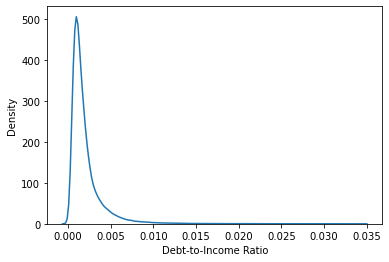

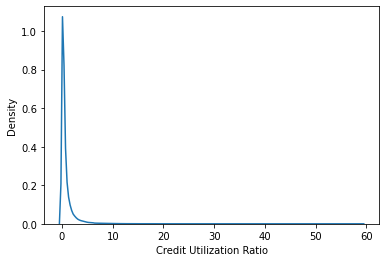

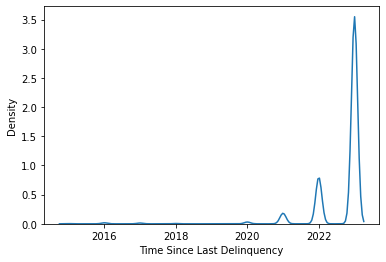

In [19]:
# This loop used to plot the distribution of each numarical column.
for i in data.columns:
    if type(data[i][0])!=str:
        sns.distplot(data[i],hist=False) 
        plt.show()

<AxesSubplot:xlabel='Loan Amount', ylabel='Funded Amount'>

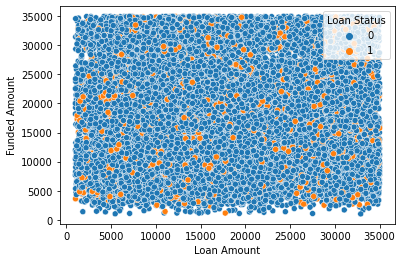

In [20]:
# scatterplot
sns.scatterplot(x=data['Loan Amount'],y=data['Funded Amount'],hue=data['Loan Status']) 

### Observation.
1.Loan Status: 1 = Defaulter, 0 = Non Defaulters
2.Non Defaulters are the people who pay back the money back with in the given ample of time.
3.Defaulter are the pople who will not returns the money back with in the given ample of time.
4.The scatter plot between the Funded and loan amount, the class with 0 are more compared with the class 1

<AxesSubplot:ylabel='Loan Status'>

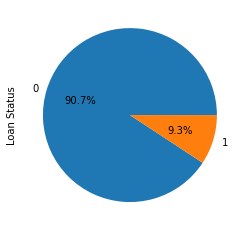

In [21]:
# pieplot onn the target column.
data['Loan Status'].value_counts().plot(kind='pie',autopct = '%0.1f%%')

### Observation:
1. It is observed that the dataset is imbalanced. 
2. class 0 is having 90 % of the data and the remaing is 10 % is 

In [22]:
data.sample() # sample function returns a random sample data point from the dataset.

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Debt-to-Income Ratio,Credit Utilization Ratio,Time Since Last Delinquency
2143,30810,7827,27259.37395,59,BAT224923,11.886718,D,B5,RENT,86688.28102,...,0,INDIVIDUAL,0,31,373855,9190,0,0.000642,1.179434,2022


Text(0, 0.5, 'Loan Amount')

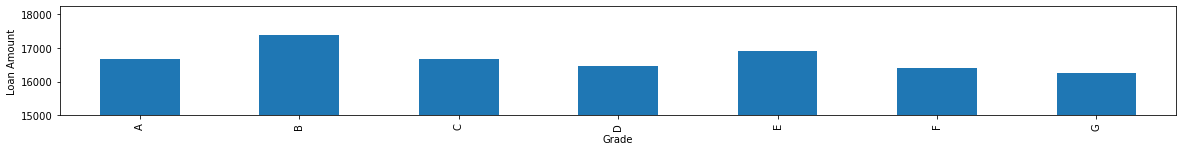

In [23]:
# Barplot between Grade and loanamount. 
y=data.groupby(['Grade'])['Loan Amount']
plt.figure(figsize=(20,2))
y.mean().plot(kind='bar')
plt.ylim(15000,)
plt.xlabel('Grade')
plt.ylabel('Loan Amount')

### Observation:
1. The Grade B is having higher loan amount.

Text(0, 0.5, 'Interest Rate')

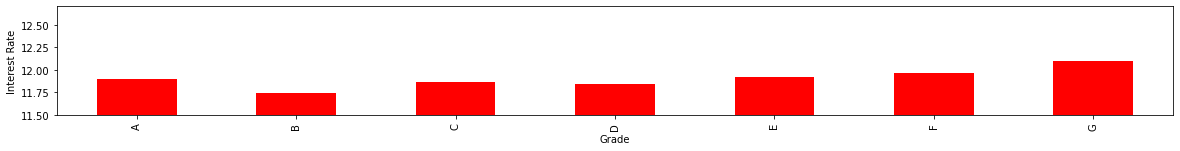

In [24]:
# Barplot between Grade and Interest Rate. 
y=data.groupby(['Grade'])['Interest Rate']
plt.figure(figsize=(20,2))
y.mean().plot(kind='bar',color='r')
plt.ylim(11.5,)
plt.xlabel('Grade')
plt.ylabel('Interest Rate')

### Observation:
1. Grage G is having the highest interest rate.

<AxesSubplot:ylabel='Loan Amount'>

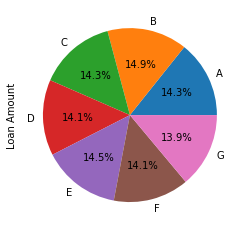

In [25]:
data.groupby('Grade').mean()['Loan Amount'].plot(kind = 'pie', autopct = '%0.1f%%')

### Observation:
1. the grade B is having the highest loan amount.

In [26]:
data['Sub Grade'].unique()

array(['C4', 'D3', 'D4', 'C3', 'G5', 'C5', 'A5', 'C2', 'B5', 'B1', 'B4',
       'A4', 'B2', 'D2', 'C1', 'F3', 'D1', 'F2', 'A2', 'A3', 'F1', 'E5',
       'B3', 'F4', 'G1', 'F5', 'E1', 'E2', 'D5', 'G2', 'E4', 'A1', 'G3',
       'E3', 'G4'], dtype=object)

### Observation:
1. there are around 35 different times of sub grades available. 

Text(0, 0.5, 'Loan Amount')

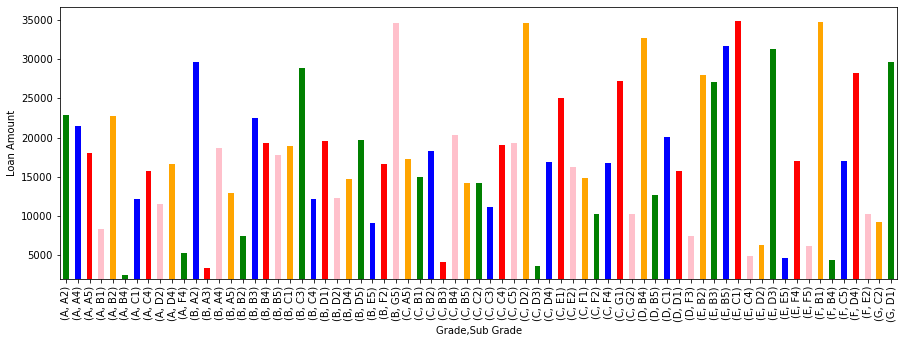

In [27]:
# Barplot between 'Grade','Sub Grade' and Loan Amount. 
data1=data.loc[0:100,:]
y=data1.groupby(['Grade','Sub Grade'])['Loan Amount']
plt.figure(figsize=(15,5))
y.mean().plot(kind='bar',color=['g','b','r','pink','orange'])
plt.ylim(2000,)
plt.ylabel('Loan Amount')

### Observation:
1. The Grade with B,C,E are having highest loan amount.

<function matplotlib.pyplot.legend(*args, **kwargs)>

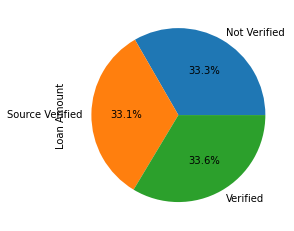

In [28]:
data.groupby('Verification Status').mean()['Loan Amount'].plot(kind = 'pie', autopct = '%0.1f%%')
plt.legend

### Observation:
1. The varification status with verified is having higher loan amount with 33.6% and followed by others.

<AxesSubplot:xlabel='Last week Pay'>

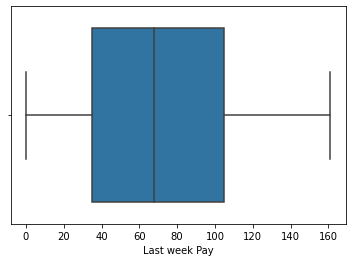

In [29]:
sns.boxplot(data['Last week Pay'])

### Observation:
1. It is obsereved that the data in this column is normal distribution, and the data is not skewned.

<AxesSubplot:>

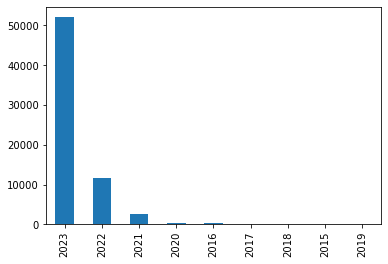

In [30]:
data['Time Since Last Delinquency'].value_counts().plot(kind='bar')

### Observation:
1. The Time Since Last Delinquency is having the maximum values in the year 2023.

In [31]:
data3 = data.sort_values(by = 'Grade', ascending = True)
data3

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Debt-to-Income Ratio,Credit Utilization Ratio,Time Since Last Delinquency
24096,13880,21641,17339.992700,59,BAT1104812,11.343193,A,D2,MORTGAGE,38518.65990,...,0,INDIVIDUAL,74,1117,211270,24116,0,0.001779,0.216868,2023
19065,17104,26316,13567.490460,36,BAT2333412,9.251004,A,B5,RENT,66718.90703,...,0,INDIVIDUAL,48,12,137097,9941,0,0.001167,0.789458,2023
9995,31046,10306,17120.807510,58,BAT2428731,16.367368,A,B3,MORTGAGE,110562.88070,...,0,INDIVIDUAL,21,24,260354,15627,0,0.001061,0.233250,2022
33119,11463,32011,14656.786460,58,BAT2522922,12.281705,A,C1,MORTGAGE,47070.19809,...,0,INDIVIDUAL,71,1454,323120,1319,0,0.002110,6.836998,2023
49411,16026,15636,16551.175890,59,BAT4136152,6.412427,A,A2,RENT,169566.80070,...,0,INDIVIDUAL,16,40,383574,37520,0,0.001419,0.155943,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9295,20452,34112,11553.412650,58,BAT3873588,15.863486,G,C4,OWN,51405.17536,...,0,INDIVIDUAL,104,40,255125,8733,0,0.000627,0.059201,2020
54411,1871,8393,9108.122873,59,BAT1586599,10.253418,G,B3,RENT,86810.68808,...,0,INDIVIDUAL,51,13,133308,13601,1,0.008083,0.520623,2023
24728,23499,16571,11038.390950,59,BAT1780517,12.059969,G,B4,MORTGAGE,69292.38801,...,0,INDIVIDUAL,92,568,79001,24512,0,0.000777,0.070496,2023
15206,22931,8581,22670.946490,36,BAT3461431,15.161516,G,D5,MORTGAGE,96846.23465,...,0,INDIVIDUAL,131,35,169851,23376,0,0.000742,0.212868,2021


<AxesSubplot:xlabel='Grade', ylabel='count'>

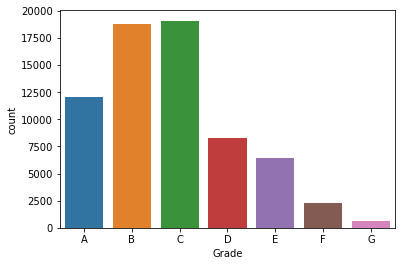

In [32]:
sns.countplot(data = data3, x='Grade') 

### Observation:
1. moset of the datapoints belongs to Grade C and followed by Grade B

<AxesSubplot:xlabel='Total Accounts', ylabel='count'>

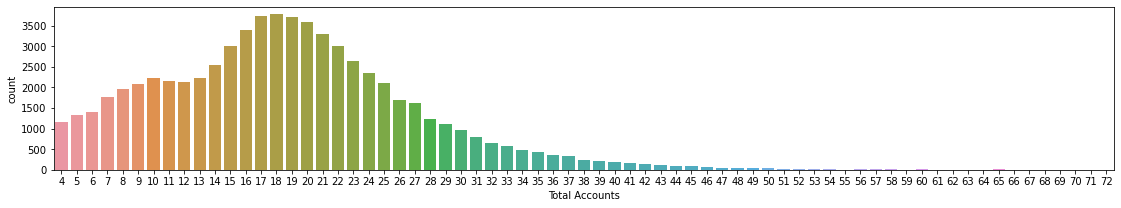

In [33]:
plt.figure(figsize=(19,3))
sns.countplot(data = data3, x='Total Accounts')

### Observation:
1. In the dataset the total accounts of 18 are highest.

<AxesSubplot:xlabel='Time Since Last Delinquency', ylabel='Total Received Interest'>

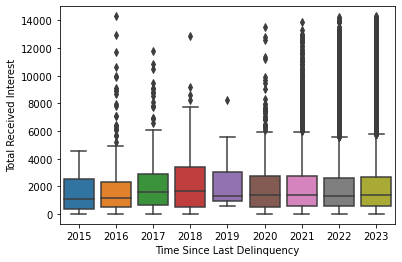

In [34]:
sns.boxplot(x='Time Since Last Delinquency',y='Total Received Interest',data=data)

### Observation:
1. The total recives interest is high in the year 2018.

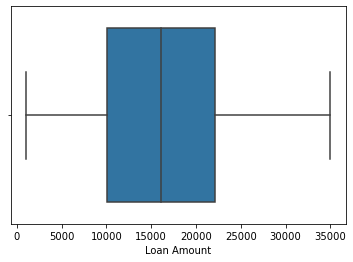

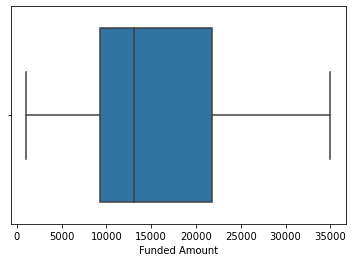

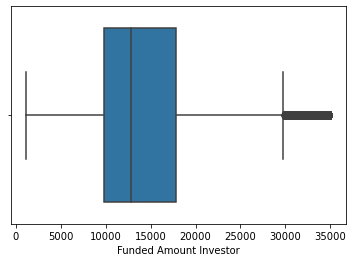

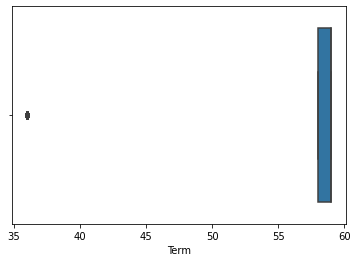

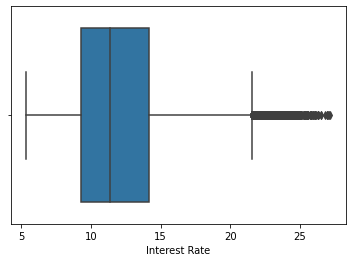

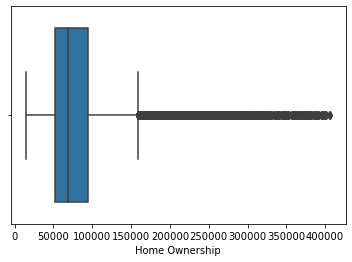

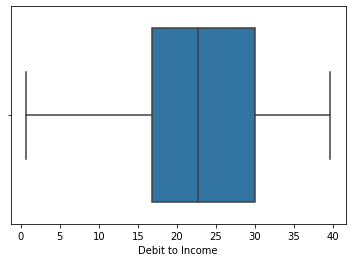

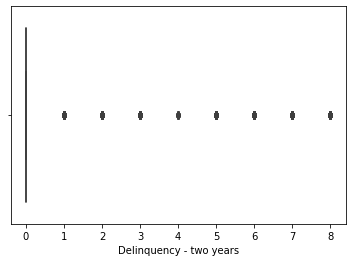

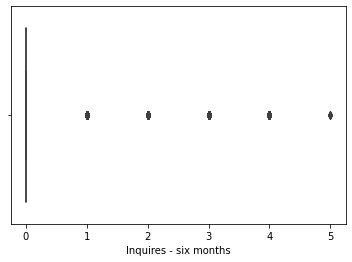

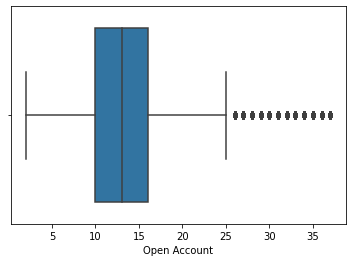

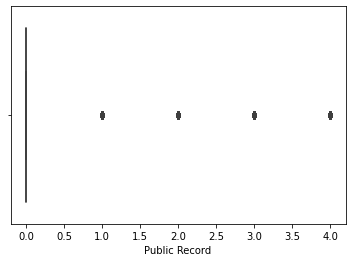

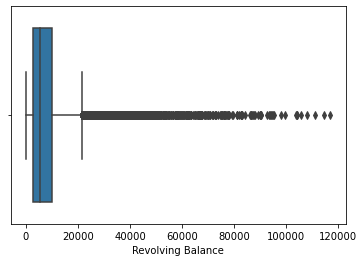

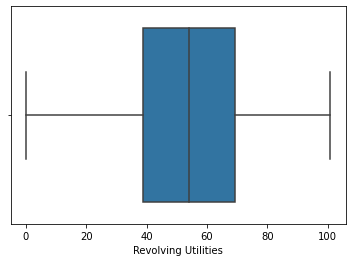

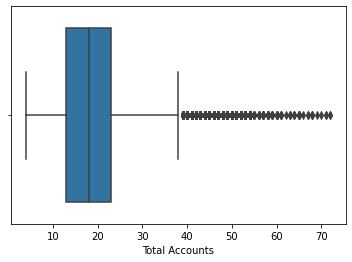

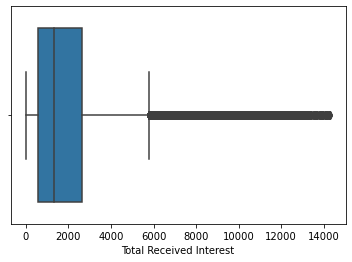

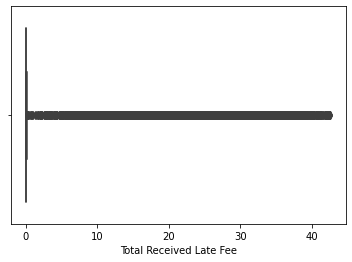

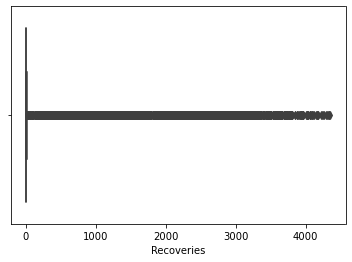

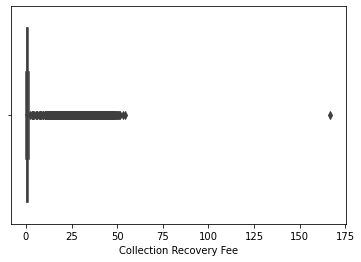

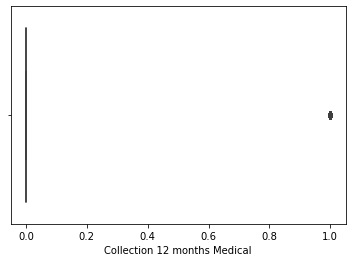

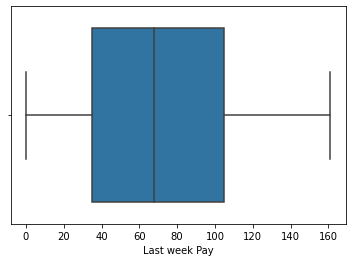

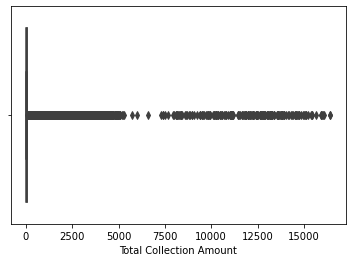

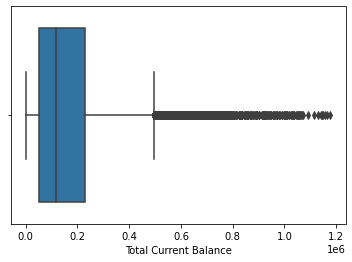

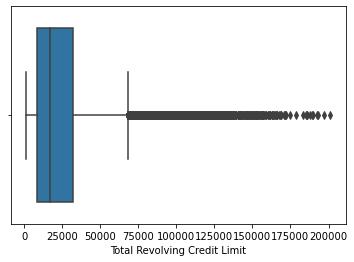

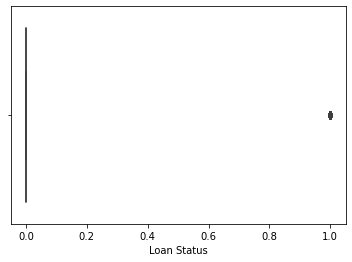

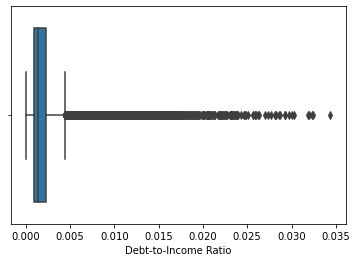

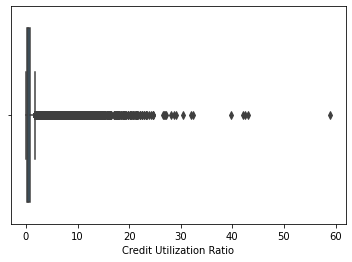

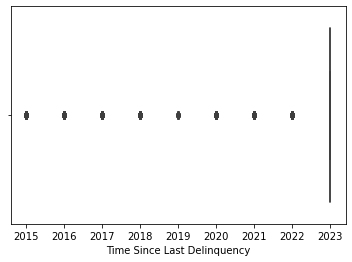

In [35]:
for i in data.columns:
    if type(data[i][0])!=str:
        sns.boxplot(data[i])
        plt.show()

In [36]:
# Outlier treatment using IQR method.

In [37]:
l=np.percentile(data['Funded Amount Investor'].values,[25,50,75])
iqr=l[-1]-l[0]
lw=l[0]-(1.5*iqr)
uw=l[-1]+(1.5*iqr)
a=data.loc[(data['Funded Amount Investor']<lw)]
b=data.loc[(data['Funded Amount Investor']>uw)]
print('a',a.index)
print('b',b.index)

a Int64Index([], dtype='int64')
b Int64Index([   14,    43,    53,    72,    76,   106,   137,   142,   159,
              160,
            ...
            67253, 67261, 67296, 67311, 67341, 67344, 67345, 67346, 67428,
            67438],
           dtype='int64', length=3103)


In [38]:
data.loc[b.index,'Funded Amount Investor']=uw

<AxesSubplot:xlabel='Funded Amount Investor'>

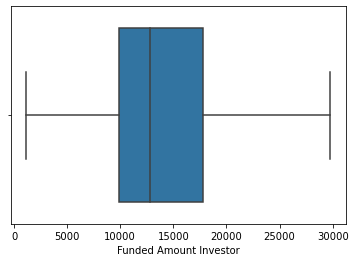

In [39]:
sns.boxplot(data['Funded Amount Investor'])

In [40]:
l=np.percentile(data['Interest Rate'].values,[25,50,75])
iqr=l[-1]-l[0]
lw=l[0]-(1.5*iqr)
uw=l[-1]+(1.5*iqr)
a=data.loc[(data['Interest Rate']<lw)]
b=data.loc[(data['Interest Rate']>uw)]
print('a',a.index)
print('b',b.index)

a Int64Index([], dtype='int64')
b Int64Index([   79,   228,   238,   254,   277,   329,   357,   361,   425,
              455,
            ...
            66458, 66486, 66542, 66558, 66666, 66711, 66714, 66736, 67156,
            67169],
           dtype='int64', length=851)


In [41]:
data.loc[b.index,'Interest Rate']=uw

<AxesSubplot:xlabel='Interest Rate'>

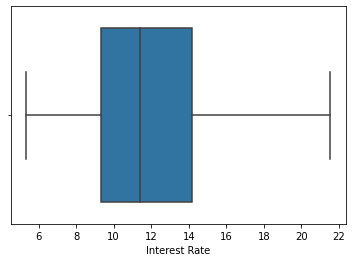

In [42]:
sns.boxplot(data['Interest Rate'])

In [43]:
l=np.percentile(data['Home Ownership'].values,[25,50,75])
iqr=l[-1]-l[0]
lw=l[0]-(1.5*iqr)
uw=l[-1]+(1.5*iqr)
a=data.loc[(data['Home Ownership']<lw)]
b=data.loc[(data['Home Ownership']>uw)]
print('a',a.index)
print('b',b.index)

a Int64Index([], dtype='int64')
b Int64Index([    0,    18,    20,    26,    38,    50,    82,   105,   116,
              118,
            ...
            67334, 67364, 67370, 67373, 67394, 67417, 67421, 67438, 67445,
            67448],
           dtype='int64', length=4115)


<AxesSubplot:xlabel='Home Ownership'>

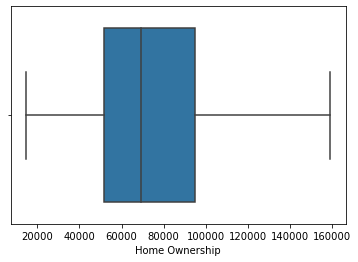

In [44]:
data.loc[b.index,'Home Ownership']=uw
sns.boxplot(data['Home Ownership'])

In [45]:
l=np.percentile(data['Revolving Balance'].values,[25,50,75])
iqr=l[-1]-l[0]
lw=l[0]-(1.5*iqr)
uw=l[-1]+(1.5*iqr)
a=data.loc[(data['Revolving Balance']<lw)]
b=data.loc[(data['Revolving Balance']>uw)]
print('a',a.index)
print('b',b.index)

a Int64Index([], dtype='int64')
b Int64Index([    0,    32,    59,   101,   118,   148,   152,   157,   251,
              262,
            ...
            67314, 67318, 67338, 67341, 67367, 67392, 67401, 67418, 67451,
            67452],
           dtype='int64', length=3719)


<AxesSubplot:xlabel='Revolving Balance'>

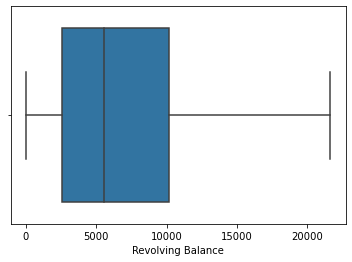

In [46]:
data.loc[b.index,'Revolving Balance']=uw
sns.boxplot(data['Revolving Balance'])

In [47]:
l=np.percentile(data['Total Accounts'].values,[25,50,75])
iqr=l[-1]-l[0]
lw=l[0]-(1.5*iqr)
uw=l[-1]+(1.5*iqr)
a=data.loc[(data['Total Accounts']<lw)]
b=data.loc[(data['Total Accounts']>uw)]
print('a',a.index)
print('b',b.index)

a Int64Index([], dtype='int64')
b Int64Index([   10,    44,   133,   151,   212,   274,   283,   333,   357,
              447,
            ...
            66948, 67124, 67141, 67167, 67305, 67350, 67360, 67382, 67405,
            67424],
           dtype='int64', length=1424)


<AxesSubplot:xlabel='Total Accounts'>

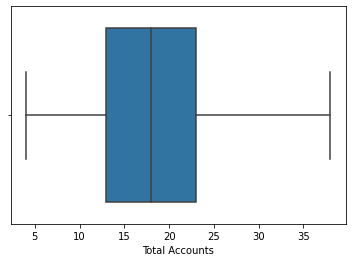

In [48]:
data.loc[b.index,'Total Accounts']=uw
sns.boxplot(data['Total Accounts'])

In [49]:
l=np.percentile(data['Total Received Interest'].values,[25,50,75])
iqr=l[-1]-l[0]
lw=l[0]-(1.5*iqr)
uw=l[-1]+(1.5*iqr)
a=data.loc[(data['Total Received Interest']<lw)]
b=data.loc[(data['Total Received Interest']>uw)]
print('a',a.index)
print('b',b.index)

a Int64Index([], dtype='int64')
b Int64Index([   13,    21,    23,    56,    78,   114,   125,   127,   133,
              136,
            ...
            67312, 67314, 67369, 67381, 67382, 67393, 67400, 67411, 67418,
            67421],
           dtype='int64', length=4978)


<AxesSubplot:xlabel='Total Received Interest'>

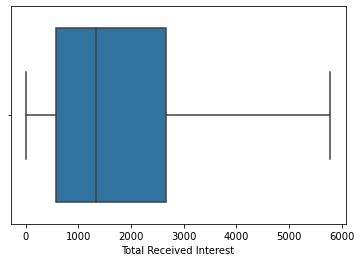

In [50]:
data.loc[b.index,'Total Received Interest']=uw
sns.boxplot(data['Total Received Interest'])

In [51]:
l=np.percentile(data['Total Received Late Fee'].values,[25,50,75])
iqr=l[-1]-l[0]
lw=l[0]-(1.5*iqr)
uw=l[-1]+(1.5*iqr)
a=data.loc[(data['Total Received Late Fee']<lw)]
b=data.loc[(data['Total Received Late Fee']>uw)]
print('a',a.index)
print('b',b.index)

a Int64Index([], dtype='int64')
b Int64Index([    2,     4,    19,    26,    68,    80,   135,   172,   192,
              225,
            ...
            67254, 67270, 67286, 67323, 67327, 67340, 67355, 67360, 67399,
            67412],
           dtype='int64', length=3374)


<AxesSubplot:xlabel='Total Received Late Fee'>

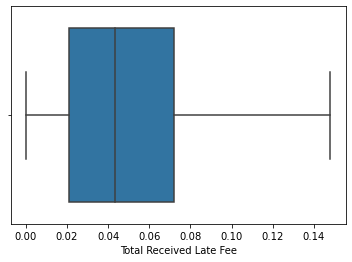

In [52]:
data.loc[b.index,'Total Received Late Fee']=uw
sns.boxplot(data['Total Received Late Fee'])

In [53]:
l=np.percentile(data['Recoveries'].values,[25,50,75])
iqr=l[-1]-l[0]
lw=l[0]-(1.5*iqr)
uw=l[-1]+(1.5*iqr)
a=data.loc[(data['Recoveries']<lw)]
b=data.loc[(data['Recoveries']>uw)]
print('a',a.index)
print('b',b.index)

a Int64Index([], dtype='int64')
b Int64Index([    4,    30,    39,    58,   135,   190,   238,   242,   265,
              283,
            ...
            67208, 67219, 67220, 67228, 67233, 67263, 67300, 67341, 67345,
            67458],
           dtype='int64', length=2302)


<AxesSubplot:xlabel='Recoveries'>

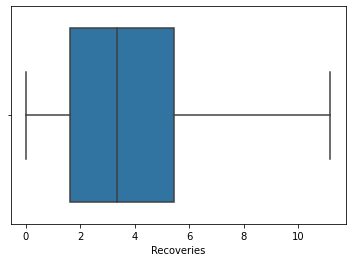

In [54]:
data.loc[b.index,'Recoveries']=uw
sns.boxplot(data['Recoveries'])

In [55]:
l=np.percentile(data['Collection Recovery Fee'].values,[25,50,75])
iqr=l[-1]-l[0]
lw=l[0]-(1.5*iqr)
uw=l[-1]+(1.5*iqr)
a=data.loc[(data['Collection Recovery Fee']<lw)]
b=data.loc[(data['Collection Recovery Fee']>uw)]
print('a',a.index)
print('b',b.index)

a Int64Index([], dtype='int64')
b Int64Index([  241,   339,   420,   453,   609,   641,   725,   814,   891,
              915,
            ...
            66553, 66624, 66803, 67018, 67097, 67192, 67216, 67391, 67393,
            67406],
           dtype='int64', length=809)


<AxesSubplot:xlabel='Collection Recovery Fee'>

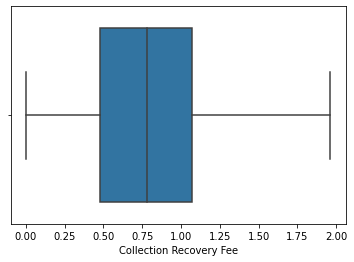

In [56]:
data.loc[b.index,'Collection Recovery Fee']=uw
sns.boxplot(data['Collection Recovery Fee'])

In [57]:
l=np.percentile(data['Total Collection Amount'].values,[25,50,75])
iqr=l[-1]-l[0]
lw=l[0]-(1.5*iqr)
uw=l[-1]+(1.5*iqr)
a=data.loc[(data['Total Collection Amount']<lw)]
b=data.loc[(data['Total Collection Amount']>uw)]
print('a',a.index)
print('b',b.index)

a Int64Index([], dtype='int64')
b Int64Index([    4,     6,    13,    22,    25,    32,    44,    52,    66,
               74,
            ...
            67325, 67340, 67350, 67355, 67367, 67368, 67408, 67439, 67440,
            67450],
           dtype='int64', length=4790)


<AxesSubplot:xlabel='Total Collection Amount'>

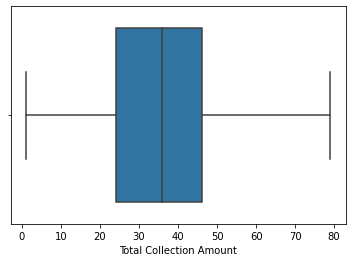

In [58]:
data.loc[b.index,'Total Collection Amount']=uw
sns.boxplot(data['Total Collection Amount'])

In [59]:
l=np.percentile(data['Total Current Balance'].values,[25,50,75])
iqr=l[-1]-l[0]
lw=l[0]-(1.5*iqr)
uw=l[-1]+(1.5*iqr)
a=data.loc[(data['Total Current Balance']<lw)]
b=data.loc[(data['Total Current Balance']>uw)]
print('a',a.index)
print('b',b.index)

a Int64Index([], dtype='int64')
b Int64Index([   98,   181,   195,   207,   250,   256,   284,   285,   290,
              291,
            ...
            67178, 67192, 67278, 67283, 67303, 67313, 67342, 67376, 67418,
            67457],
           dtype='int64', length=1971)


<AxesSubplot:xlabel='Total Current Balance'>

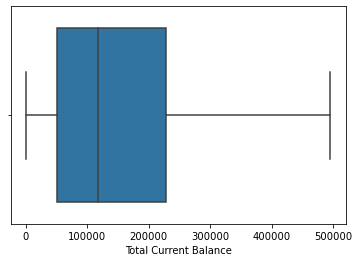

In [60]:
data.loc[b.index,'Total Current Balance']=uw
sns.boxplot(data['Total Current Balance'])

In [61]:
l=np.percentile(data['Total Revolving Credit Limit'].values,[25,50,75])
iqr=l[-1]-l[0]
lw=l[0]-(1.5*iqr)
uw=l[-1]+(1.5*iqr)
a=data.loc[(data['Total Revolving Credit Limit']<lw)]
b=data.loc[(data['Total Revolving Credit Limit']>uw)]
print('a',a.index)
print('b',b.index)

a Int64Index([], dtype='int64')
b Int64Index([   42,    57,   104,   129,   131,   161,   170,   184,   193,
              233,
            ...
            67251, 67285, 67289, 67339, 67392, 67410, 67412, 67438, 67441,
            67455],
           dtype='int64', length=2689)


<AxesSubplot:xlabel='Total Revolving Credit Limit'>

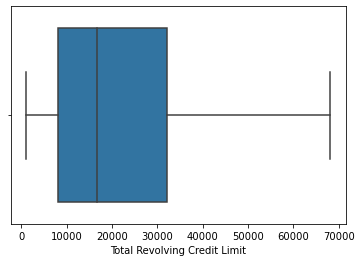

In [62]:
data.loc[b.index,'Total Revolving Credit Limit']=uw
sns.boxplot(data['Total Revolving Credit Limit'])

In [63]:
others=data[['Term','Loan Status','Delinquency - two years','Inquires - six months','Open Account','Public Record','Public Record','Collection 12 months Medical','Time Since Last Delinquency']]
others

,Term,Loan Status,Delinquency - two years,Inquires - six months,Open Account,Public Record,Public Record,Collection 12 months Medical,Time Since Last Delinquency
0,59,0,1,0,13,0,0,0,2022
1,59,0,0,0,12,0,0,0,2023
2,59,0,0,0,14,0,0,0,2023
3,59,0,1,0,7,0,0,0,2022
4,59,0,1,3,13,1,1,0,2022
...,...,...,...,...,...,...,...,...,...
67458,59,1,1,0,13,0,0,0,2022
67459,59,0,0,0,12,0,0,0,2023
67460,59,0,0,0,7,1,1,0,2023
67461,59,0,0,0,14,0,0,0,2023


In [64]:
data_num = data.select_dtypes(include=["float",'int'])
data_num.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Debt-to-Income Ratio,Credit Utilization Ratio,Time Since Last Delinquency
0,10000,32236,12329.36286,59,11.135007,159023.54196,16.284758,1,0,13,...,0.793724,0,49,31,311301,6619,0,0.001628,3.663091,2022
1,3609,11940,12191.99692,59,12.237563,39833.92100,15.412409,0,0,12,...,0.974821,0,109,53,182610,20885,0,0.004271,0.038880,2023
2,28276,9311,21603.22455,59,12.545884,91506.69105,28.137619,0,0,14,...,1.020075,0,66,34,89801,26155,0,0.000995,0.070465,2023
3,11170,6954,17877.15585,59,16.731201,108286.57590,18.043730,1,0,7,...,0.749971,0,39,40,9189,60214,0,0.001615,0.229498,2022
4,16890,13226,13539.92667,59,15.008300,44234.82545,17.209886,1,3,13,...,0.368953,0,18,79,126029,22579,0,0.001019,0.068382,2022


In [65]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print('--------------------------')

Loan Amount
15932    13
14424    12
15800    11
15639    11
15118    11
         ..
2588      1
33968     1
5420      1
12285     1
8323      1
Name: Loan Amount, Length: 27525, dtype: int64
--------------------------
Funded Amount
10835    16
11034    15
11451    14
10728    14
7691     14
         ..
23126     1
14571     1
33015     1
33109     1
29875     1
Name: Funded Amount, Length: 24548, dtype: int64
--------------------------
Funded Amount Investor
29771.457824    3103
14238.250350       2
11225.072690       2
13971.023210       2
9157.993403        2
                ... 
14274.010090       1
11604.492980       1
17535.626810       1
16180.623210       1
14207.448600       1
Name: Funded Amount Investor, Length: 64340, dtype: int64
--------------------------
Term
59    43780
58    22226
36     1457
Name: Term, dtype: int64
--------------------------
Batch Enrolled
BAT3873588    3626
BAT1586599    3142
BAT1104812    2996
BAT2252229    2557
BAT2803411    2425
BAT1780517    2403

In [66]:
data_num.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Home Ownership', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Total Received Interest', 'Total Received Late Fee',
       'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical',
       'Last week Pay', 'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status', 'Debt-to-Income Ratio',
       'Credit Utilization Ratio', 'Time Since Last Delinquency'],
      dtype='object')

In [67]:
data_num.shape

(67463, 27)

In [68]:
data_num.drop(['Term','Delinquency - two years','Inquires - six months', 'Open Account','Public Record','Total Accounts','Collection 12 months Medical','Loan Status','Time Since Last Delinquency'],axis=1,inplace=True)
data_num.shape

(67463, 18)

In [69]:
# standardizing the datas numarical column.

In [70]:
scaler = StandardScaler()

data_num = pd.DataFrame(scaler.fit_transform(data_num),
                                    columns=data_num.columns,
                                    index = data_num.index
                                   )
data_num

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Revolving Balance,Revolving Utilities,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Debt-to-Income Ratio,Credit Utilization Ratio
0,-0.818483,2.020064,-0.335208,-0.189088,2.300180,-0.829943,2.424754,0.977986,0.628753,1.361328,-0.483006,0.028910,-0.511670,-0.300510,1.212537,-0.875594,-0.190173,1.811521
1,-1.582243,-0.469958,-0.356479,0.111806,-1.065112,-0.933158,-1.072667,1.127265,-0.667388,-0.388118,-0.527377,0.478029,0.873515,0.928013,0.206041,-0.075805,1.084246,-0.478009
2,1.365603,-0.792498,1.100868,0.195949,0.393857,0.572470,-0.899424,-2.254570,-0.612970,2.582544,0.183229,0.590258,-0.119201,-0.132984,-0.519821,0.219645,-0.495683,-0.458056
3,-0.678661,-1.081668,0.523879,1.338149,0.867633,-0.621824,1.112953,0.646804,-0.958598,-0.176981,-1.359332,-0.079596,-0.742534,0.202068,-1.150290,2.129081,-0.196493,-0.357590
4,0.004911,-0.312185,-0.147749,0.867958,-0.940854,-0.720484,-0.949666,1.435774,-1.054107,2.582544,2.702083,-1.024517,-1.227349,2.379904,-0.236481,0.019165,-0.484187,-0.459372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,-0.388143,-1.094672,-0.204215,-0.660165,0.180810,0.568625,-0.518155,1.991631,0.057445,-0.725489,2.702083,0.206244,-0.049942,0.648803,0.199510,0.676331,0.021063,-0.426839
67459,-1.018894,-0.579639,0.177058,-0.506452,-0.340687,-0.663171,0.427038,-1.650396,0.731607,-0.629431,-0.659936,1.540821,-1.319695,0.034542,-1.044683,-0.758143,0.049786,0.203325
67460,-0.113758,2.104103,-0.335193,2.134965,-1.206849,-1.538551,-0.840276,-2.279991,0.485941,-0.599771,0.680459,2.046055,1.519934,-1.082297,0.161047,1.126457,-0.663278,-0.469813
67461,-0.033689,-1.324462,1.062226,0.366027,0.547232,-1.855781,-1.012175,0.691790,1.067248,0.629754,-0.974381,-1.424650,0.042404,1.374749,1.603886,0.943973,-0.753975,-0.483623


In [71]:
data_cat = data.select_dtypes(include=["object"])

data_cat.head()

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Loan Title,Initial List Status,Application Type
0,BAT2522922,B,C4,MORTGAGE,Not Verified,Debt Consolidation,w,INDIVIDUAL
1,BAT1586599,C,D3,RENT,Source Verified,Debt consolidation,f,INDIVIDUAL
2,BAT2136391,F,D4,MORTGAGE,Source Verified,Debt Consolidation,w,INDIVIDUAL
3,BAT2428731,C,C3,MORTGAGE,Source Verified,Debt consolidation,w,INDIVIDUAL
4,BAT5341619,C,D4,MORTGAGE,Source Verified,Credit card refinancing,w,INDIVIDUAL


In [72]:
data_cat.columns

Index(['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration',
       'Verification Status', 'Loan Title', 'Initial List Status',
       'Application Type'],
      dtype='object')

In [73]:
data_cat.drop(['Loan Title'],axis=1,inplace=True)

In [74]:
data_cat

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Initial List Status,Application Type
0,BAT2522922,B,C4,MORTGAGE,Not Verified,w,INDIVIDUAL
1,BAT1586599,C,D3,RENT,Source Verified,f,INDIVIDUAL
2,BAT2136391,F,D4,MORTGAGE,Source Verified,w,INDIVIDUAL
3,BAT2428731,C,C3,MORTGAGE,Source Verified,w,INDIVIDUAL
4,BAT5341619,C,D4,MORTGAGE,Source Verified,w,INDIVIDUAL
...,...,...,...,...,...,...,...
67458,BAT3193689,C,A4,MORTGAGE,Verified,w,INDIVIDUAL
67459,BAT1780517,C,B3,RENT,Source Verified,w,INDIVIDUAL
67460,BAT1761981,A,F3,MORTGAGE,Verified,w,INDIVIDUAL
67461,BAT2333412,D,E3,OWN,Not Verified,f,INDIVIDUAL


In [75]:
#  converting categorical features into numerical using LabelEncoder.

In [76]:
encoder_=LabelEncoder()
data_cat['Batch Enrolled']=encoder_.fit_transform(data['Batch Enrolled'])
data_cat['Grade']=encoder_.fit_transform(data['Grade'])
data_cat['Sub Grade']=encoder_.fit_transform(data['Sub Grade'])
data_cat['Employment Duration']=encoder_.fit_transform(data['Employment Duration'])
data_cat['Verification Status']=encoder_.fit_transform(data['Verification Status'])
data_cat['Initial List Status']=encoder_.fit_transform(data['Initial List Status'])
data_cat['Application Type']=encoder_.fit_transform(data['Application Type'])

In [77]:
data_cat

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Initial List Status,Application Type
0,16,1,13,0,0,1,0
1,4,2,17,2,1,0,0
2,11,5,18,0,1,1,0
3,15,2,12,0,1,1,0
4,32,2,18,0,1,1,0
...,...,...,...,...,...,...,...
67458,21,2,3,0,2,1,0
67459,7,2,7,2,1,1,0
67460,5,0,27,0,2,1,0
67461,14,3,22,1,0,0,0


In [78]:
# joining all the columns.

In [79]:
data_transformed = pd.concat([data_num,data_cat,others],axis=1)
data_transformed.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Revolving Balance,Revolving Utilities,Total Received Interest,Total Received Late Fee,...,Application Type,Term,Loan Status,Delinquency - two years,Inquires - six months,Open Account,Public Record,Public Record,Collection 12 months Medical,Time Since Last Delinquency
0,-0.818483,2.020064,-0.335208,-0.189088,2.300180,-0.829943,2.424754,0.977986,0.628753,1.361328,...,0,59,0,1,0,13,0,0,0,2022
1,-1.582243,-0.469958,-0.356479,0.111806,-1.065112,-0.933158,-1.072667,1.127265,-0.667388,-0.388118,...,0,59,0,0,0,12,0,0,0,2023
2,1.365603,-0.792498,1.100868,0.195949,0.393857,0.572470,-0.899424,-2.254570,-0.612970,2.582544,...,0,59,0,0,0,14,0,0,0,2023
3,-0.678661,-1.081668,0.523879,1.338149,0.867633,-0.621824,1.112953,0.646804,-0.958598,-0.176981,...,0,59,0,1,0,7,0,0,0,2022
4,0.004911,-0.312185,-0.147749,0.867958,-0.940854,-0.720484,-0.949666,1.435774,-1.054107,2.582544,...,0,59,0,1,3,13,1,1,0,2022


In [80]:
# splitting the data into feature variables and class labels

In [81]:
fv = data_transformed.drop(columns='Loan Status')
label =data_transformed[['Loan Status']]

In [82]:
fv

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Revolving Balance,Revolving Utilities,Total Received Interest,Total Received Late Fee,...,Initial List Status,Application Type,Term,Delinquency - two years,Inquires - six months,Open Account,Public Record,Public Record,Collection 12 months Medical,Time Since Last Delinquency
0,-0.818483,2.020064,-0.335208,-0.189088,2.300180,-0.829943,2.424754,0.977986,0.628753,1.361328,...,1,0,59,1,0,13,0,0,0,2022
1,-1.582243,-0.469958,-0.356479,0.111806,-1.065112,-0.933158,-1.072667,1.127265,-0.667388,-0.388118,...,0,0,59,0,0,12,0,0,0,2023
2,1.365603,-0.792498,1.100868,0.195949,0.393857,0.572470,-0.899424,-2.254570,-0.612970,2.582544,...,1,0,59,0,0,14,0,0,0,2023
3,-0.678661,-1.081668,0.523879,1.338149,0.867633,-0.621824,1.112953,0.646804,-0.958598,-0.176981,...,1,0,59,1,0,7,0,0,0,2022
4,0.004911,-0.312185,-0.147749,0.867958,-0.940854,-0.720484,-0.949666,1.435774,-1.054107,2.582544,...,1,0,59,1,3,13,1,1,0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,-0.388143,-1.094672,-0.204215,-0.660165,0.180810,0.568625,-0.518155,1.991631,0.057445,-0.725489,...,1,0,59,1,0,13,0,0,0,2022
67459,-1.018894,-0.579639,0.177058,-0.506452,-0.340687,-0.663171,0.427038,-1.650396,0.731607,-0.629431,...,1,0,59,0,0,12,0,0,0,2023
67460,-0.113758,2.104103,-0.335193,2.134965,-1.206849,-1.538551,-0.840276,-2.279991,0.485941,-0.599771,...,1,0,59,0,0,7,1,1,0,2023
67461,-0.033689,-1.324462,1.062226,0.366027,0.547232,-1.855781,-1.012175,0.691790,1.067248,0.629754,...,0,0,59,0,0,14,0,0,0,2023


In [83]:
label

,Loan Status
0,0
1,0
2,0
3,0
4,0
...,...
67458,1
67459,0
67460,0
67461,0


In [84]:
# Splitting the data into train and test dataset

In [85]:
X_train , X_test , y_train , y_test = train_test_split(fv,label,train_size=0.8,random_state=3)

### Observation:
1. dividing the data into 80% train data and 20% of test data.

### Model building

In [86]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
# predicting with Knn
y_pred_knn = clf_knn.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt_knn = classification_report
clf_rpt_knn = classification_report(y_test, y_pred_knn)
print('classification report for KNN \n', clf_rpt_knn)

classification report for KNN 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     12235
           1       0.14      0.01      0.02      1258

    accuracy                           0.90     13493
   macro avg       0.52      0.50      0.48     13493
weighted avg       0.84      0.90      0.86     13493



In [87]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
# Predicting with Guassian naive bayes
y_pred_gnb = clf_gnb.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt_NB = classification_report(y_test, y_pred_gnb)
print('classification report for Naive Bayes regression \n',clf_rpt_NB )

classification report for Naive Bayes regression 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     12235
           1       0.14      0.04      0.07      1258

    accuracy                           0.89     13493
   macro avg       0.52      0.51      0.50     13493
weighted avg       0.84      0.89      0.86     13493



In [88]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 
clf_lr = LogisticRegression(multi_class='ovr')
clf_lr.fit(X_train, y_train)
# Prediction using Logistic regression
y_pred_lr = clf_lr.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt_lr = classification_report(y_test, y_pred_lr)
print('classification report for logistic regression \n',clf_rpt_lr )

classification report for logistic regression 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12235
           1       0.00      0.00      0.00      1258

    accuracy                           0.91     13493
   macro avg       0.45      0.50      0.48     13493
weighted avg       0.82      0.91      0.86     13493



In [89]:
# SVC
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
# Predicting with Support vector classifier
y_pred_svc = clf_svc.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt_svc = classification_report(y_test, y_pred_svc)
print('classification report for SVC regression \n',clf_rpt_svc)

classification report for SVC regression 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12235
           1       0.00      0.00      0.00      1258

    accuracy                           0.91     13493
   macro avg       0.45      0.50      0.48     13493
weighted avg       0.82      0.91      0.86     13493



In [90]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier()
clf_rfc.fit(X_train, y_train)
# Predicting with Random Forest Regressor
y_pred_rfg = clf_rfc.predict(X_test)
from sklearn.metrics import classification_report
clf_rpt_rf = classification_report(y_test, y_pred_rfg)
print('classification report for Random forest \n',clf_rpt_rf )

classification report for Random forest 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12235
           1       0.00      0.00      0.00      1258

    accuracy                           0.91     13493
   macro avg       0.45      0.50      0.48     13493
weighted avg       0.82      0.91      0.86     13493



In [91]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
# predicting with decision Tree
y_pred_dt = clf_dt.predict(X_test)
# Score
from sklearn.metrics import classification_report
clf_rpt_dt = classification_report(y_test, y_pred_dt)
print('classification report for decision tree \n', clf_rpt_dt)

classification report for decision tree 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12235
           1       0.10      0.12      0.11      1258

    accuracy                           0.82     13493
   macro avg       0.50      0.50      0.50     13493
weighted avg       0.83      0.82      0.82     13493



In [92]:
# GradientBoostingClassifier
gbr = GradientBoostingClassifier(n_estimators = 200, max_depth = 1, random_state =100)
gbr.fit(X_train, y_train)
pred_y = gbr.predict(X_test)
accuracy_score(y_test, pred_y)
clf_rpt_DT = classification_report(y_test, pred_y)
print('classification report for GradientBoostingClassifier \n',clf_rpt_DT )

classification report for GradientBoostingClassifier 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12235
           1       0.00      0.00      0.00      1258

    accuracy                           0.91     13493
   macro avg       0.45      0.50      0.48     13493
weighted avg       0.82      0.91      0.86     13493



In [93]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
clf_adb = AdaBoostClassifier()
clf_adb.fit(X_train, y_train)
# predicting with adaboost classifier
y_pred_adb = clf_adb.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt_adb = classification_report
clf_rpt_adb = classification_report(y_test, y_pred_adb)
print('classification report for adaboost \n', clf_rpt_adb)

classification report for adaboost 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12235
           1       0.00      0.00      0.00      1258

    accuracy                           0.91     13493
   macro avg       0.45      0.50      0.48     13493
weighted avg       0.82      0.91      0.86     13493



### SMOTE

In [94]:
!pip install imblearn

In [95]:
# Appling SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [96]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_smote, y_smote)
# predicting with Knn
y_pred_knn = clf_knn.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt_knn = classification_report
clf_rpt_knn = classification_report(y_test, y_pred_knn)
print('classification report for KNN \n', clf_rpt_knn)

classification report for KNN 
               precision    recall  f1-score   support

           0       0.91      0.52      0.66     12235
           1       0.09      0.47      0.16      1258

    accuracy                           0.52     13493
   macro avg       0.50      0.50      0.41     13493
weighted avg       0.83      0.52      0.62     13493



In [97]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_smote, y_smote)
# Predicting with Guassian naive bayes
y_pred_gnb = clf_gnb.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt_NB = classification_report(y_test, y_pred_gnb)
print('classification report for Naive Bayes regression \n',clf_rpt_NB )

classification report for Naive Bayes regression 
               precision    recall  f1-score   support

           0       0.90      0.22      0.36     12235
           1       0.09      0.75      0.16      1258

    accuracy                           0.27     13493
   macro avg       0.49      0.49      0.26     13493
weighted avg       0.82      0.27      0.34     13493



In [98]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 
clf_lr = LogisticRegression(multi_class='ovr')
clf_lr.fit(X_smote, y_smote)
# Prediction using Logistic regression
y_pred_lr = clf_lr.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt_lr = classification_report(y_test, y_pred_lr)
print('classification report for logistic regression \n',clf_rpt_lr )

classification report for logistic regression 
               precision    recall  f1-score   support

           0       0.91      0.64      0.75     12235
           1       0.09      0.36      0.15      1258

    accuracy                           0.61     13493
   macro avg       0.50      0.50      0.45     13493
weighted avg       0.83      0.61      0.69     13493



In [99]:
# SVC
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(X_smote, y_smote)
# Predicting with Support vector classifier
y_pred_svc = clf_svc.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt_svc = classification_report(y_test, y_pred_svc)
print('classification report for SVC regression \n',clf_rpt_svc)

classification report for SVC regression 
               precision    recall  f1-score   support

           0       0.91      0.35      0.51     12235
           1       0.10      0.68      0.17      1258

    accuracy                           0.38     13493
   macro avg       0.51      0.52      0.34     13493
weighted avg       0.84      0.38      0.48     13493



In [100]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf_rfc_smote = RandomForestClassifier()
clf_rfc_smote.fit(X_smote, y_smote)
# Predicting with Random Forest Regressor
y_pred_rfg_smote = clf_rfc_smote.predict(X_test)
from sklearn.metrics import classification_report
clf_rpt_rf_smote = classification_report(y_test, y_pred_rfg_smote)
print('classification report for Random forest using smote \n',clf_rpt_rf_smote )

classification report for Random forest using smote 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92     12235
           1       0.10      0.07      0.08      1258

    accuracy                           0.85     13493
   macro avg       0.50      0.50      0.50     13493
weighted avg       0.83      0.85      0.84     13493



In [101]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_smote, y_smote)
# predicting with decision Tree
y_pred_dt = clf_dt.predict(X_test)
# Score
from sklearn.metrics import classification_report
clf_rpt_dt = classification_report(y_test, y_pred_dt)
print('classification report for decision tree \n', clf_rpt_dt)

classification report for decision tree 
               precision    recall  f1-score   support

           0       0.91      0.78      0.84     12235
           1       0.10      0.23      0.14      1258

    accuracy                           0.73     13493
   macro avg       0.50      0.51      0.49     13493
weighted avg       0.83      0.73      0.77     13493



In [102]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
clf_adb = AdaBoostClassifier()
clf_adb.fit(X_smote, y_smote)
# predicting with adaboost classifier
y_pred_adb = clf_adb.predict(X_test)
# score
from sklearn.metrics import classification_report
clf_rpt_adb = classification_report
clf_rpt_adb = classification_report(y_test, y_pred_adb)
print('classification report for adaboost \n', clf_rpt_adb)

classification report for adaboost 
               precision    recall  f1-score   support

           0       0.91      0.76      0.83     12235
           1       0.10      0.24      0.14      1258

    accuracy                           0.72     13493
   macro avg       0.50      0.50      0.48     13493
weighted avg       0.83      0.72      0.76     13493



In [103]:
# GradientBoostingClassifier
gbr = GradientBoostingClassifier()
gbr.fit(X_smote, y_smote)
pred_y = gbr.predict(X_test)
accuracy_score(y_test, pred_y)
clf_rpt_DT = classification_report(y_test, pred_y)
print('classification report for GradientBoostingClassifier  \n',clf_rpt_DT )

classification report for GradientBoostingClassifier  
               precision    recall  f1-score   support

           0       0.91      0.81      0.86     12235
           1       0.10      0.19      0.13      1258

    accuracy                           0.76     13493
   macro avg       0.50      0.50      0.49     13493
weighted avg       0.83      0.76      0.79     13493



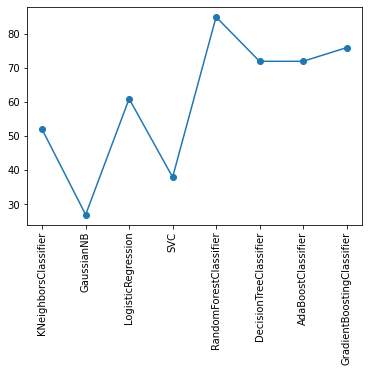

In [104]:
plt.plot(['KNeighborsClassifier','GaussianNB','LogisticRegression','SVC','RandomForestClassifier','DecisionTreeClassifier','AdaBoostClassifier','GradientBoostingClassifier'],[52,27,61,38,85,72,72,76], marker='o')
plt.xticks(rotation=90)
plt.show()

In [105]:
#### The Accuracy of the KNeighborsClassifier ==> 52%
#### The Accuracy of the  GaussianNB ==27%
#### The Accuracy of the LogisticRegression ==>61%
#### The Accuracy of the SVC ==>38%
#### The Accuracy of the RandomForestClassifier ==>85%
#### The Accuracy of the DecisionTreeClassifier ==>72%
#### The Accuracy of the AdaBoostClassifier ==>72%
#### The Accuracy of the GradientBoostingClassifier ==> 76%